In [65]:
from qaoa_and_tdvp import QAOA, tdvp_optimize_qaoa, scipy_optimize, QAOAResult
from MaxCut import MaxCut
from benchmark import get_all_connected, get_connected_rn_graph, get_rn_qubo, select_if_connected, Benchmark
from qutip.parallel import parallel_map, serial_map
from itertools import combinations_with_replacement
from qutip import *

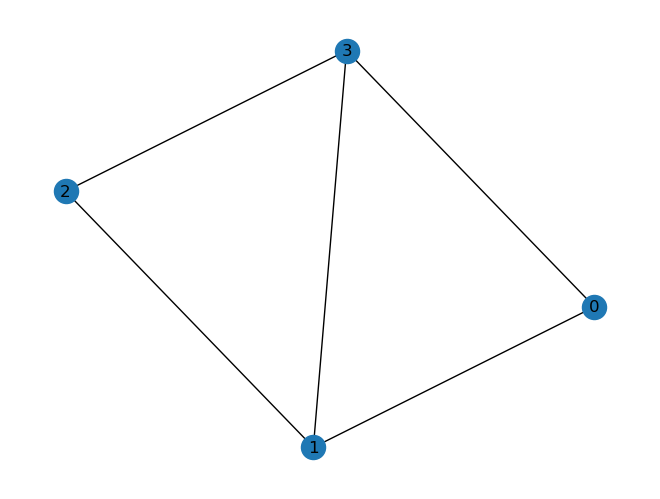

In [2]:
p = 2
n=4
instance = MaxCut(get_connected_rn_graph(n, 0.5))
qaoa = QAOA(qubo=instance.qubo, p=p)
delta = tuple(1 for _ in range(2 * qaoa.p))

In [3]:
qaoa.gram(delta)

matrix([[ 2.31642938e+00-1.31838984e-16j,
         -1.52258980e+00+1.79158507e+00j,
         -1.12063137e-15-5.33986021e-01j,
         -2.88789805e-01-8.23654371e-02j],
        [-1.52258980e+00-1.79158507e+00j,
          9.96083937e+00+3.36102673e-16j,
         -4.85552115e-01+1.08240070e-01j,
         -2.88084322e-03+2.43148277e-01j],
        [-1.12063137e-15+5.33986021e-01j,
         -4.85552115e-01-1.08240070e-01j,
          2.65000000e+01+0.00000000e+00j,
         -1.08835136e+01+3.28009356e+00j],
        [-2.88789805e-01+8.23654371e-02j,
         -2.88084322e-03-2.43148277e-01j,
         -1.08835136e+01-3.28009356e+00j,
          1.35863046e+01+2.37440276e-15j]])

In [6]:
res = tdvp_optimize_qaoa(
    qaoa,
    delta,
    1,
    int_mode="RK45",
    rhs_mode="qaoa",
    grad_tol=0.05,
    max_iter=300,
)
print(res)

rhs step 42
 done

        tdvp_optimizer with circuit gradient evaluation and RK45 as integration mode terminated with sucess with message
        "A termination event occurred."
        This took 230.30 seconds
        
            optimal parameters: (0.8881548930274965, 1.3581273759598844, 0.898205040393557, 1.0557247180430571)
                 optimal value: 12.738110656786498
        maximal ground overlap: 0.9204057311474542
           number of fun calls: 26
               number of steps: 42
               number of gates: 56
        


In [12]:
len(qaoa.circuit(delta).propagators())

28

In [34]:
def my_map(task,values, task_args):
    return map(lambda x: task(x, *task_args), values)

In [69]:
qaoa.reset_gate_counter()
list(parallel_map(
            task=qaoa._Gij,
            values=[(0,0),(0,1)],  # all combinations of indices, including the diagonal
            task_args=(delta,),
        ))
qaoa.num_gates

0